# Convolutional Neural Networks with TensorFlow-Keras Exercise (6 points)

The homework assignment is due by the end of the day on Thursday, November 13.

You are expected to solve the assignment problems independently and adhere to the university's policies for academic honesty and integrity. Copying solutions to the assignment problems from your classmates, the internet, or anywhere else is strictly prohibited.

**Note that your solutions are expected to follow the code examples provided in the lecture notes. If your solution to a problem uses functions or codes that are not covered in the lecture notes, that will result in zero marks assigned for that problem.**

CNN TensorFlow-Keras exercise: 6 points

Total points for Assignment 5: 25 points

## Part 1. Load the Dataset (1 point)

For this exercise, we will again use the Fashion MNIST dataset, which we used in Lecture 14. Recall that the dataset consists of 60,000 train and 10,000 test images of fashion items.

Import the necessary libraries (TensorFlow, NumPy, Matplotlib), and  load the Fashion MNIST dataset from the TensorFlow-Keras built-in datasets.

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(train_data, train_label), (test_data, test_label) = tf.keras.datasets.fashion_mnist.load_data()

Display the shape of the train and test arrays of images and labels.

In [15]:
# Normalize the data
train_data = train_data / 255.0
test_data = test_data / 255.0

# Display the shapes of the arrays
print('Training images shape:', train_data.shape)
print('Training labels shape:', train_label.shape)
print('Testing images shape:', test_data.shape)
print('Testing labels shape:', test_label.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


Display the maximum and minimum values of the images.

In [16]:
# Display the range of images
print('Max pixel value:', np.max(train_data))
print('Min pixel value:', np.min(train_data))
print('Data type:', train_data.dtype)

Max pixel value: 1.0
Min pixel value: 0.0
Data type: float64


Resize the images to be in the [0,1] range, and display again the maximum and minimum values to make sure that the scaling was done properly.

In [17]:
# Display the range of images after normalization
print('Max pixel value:', np.max(train_data))
print('Min pixel value:', np.min(train_data))
print('Data type:', train_data[0].dtype)

Max pixel value: 1.0
Min pixel value: 0.0
Data type: float64


Display several images in the training dataset **and their labels**.

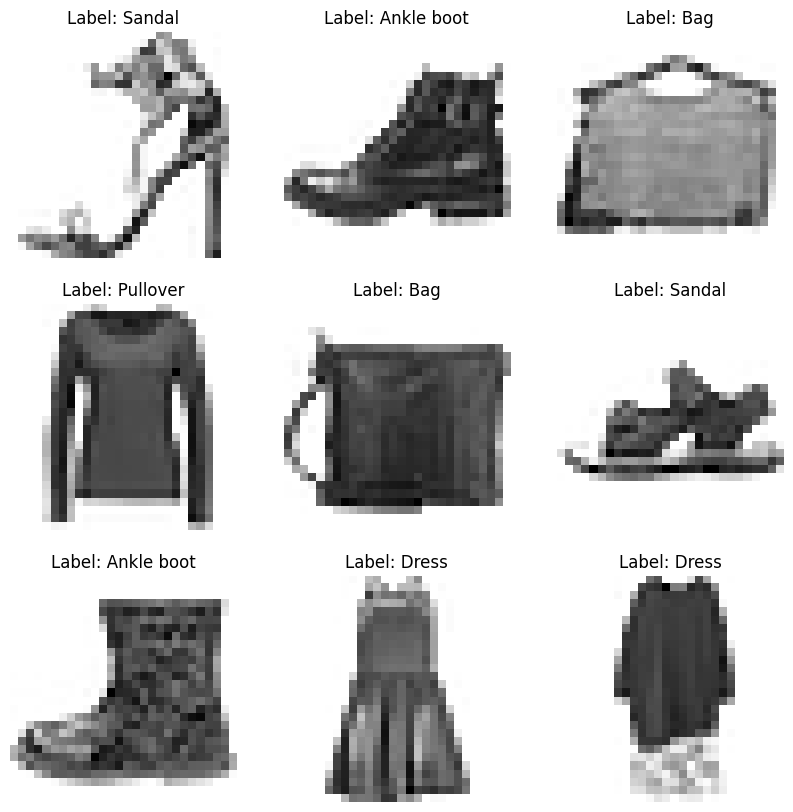

In [18]:
(train_data_raw, train_label_raw), (test_data_raw, test_label_raw) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the data
train_data = train_data_raw.astype('float32') / 255.0

# Define the class names for Fashion MNIST
label_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Plot a few images
plt.figure(figsize=(10, 10))
for n in range(9):

    i = np.random.randint(0, len(train_data), 1)

    ax = plt.subplot(3, 3, n + 1)

    plt.imshow(train_data[i[0]], cmap=plt.cm.binary)

    label_index = train_label_raw[i[0]]
    plt.title('Label: ' + str(label_names[label_index]))

    plt.axis('off')

plt.show()

## Part 2. Model Definition and Training (1 point)

Create a model called `fminst_1` which has the following layers:
- Input layer
- Convolutional layer with 128 filters and kernel size of 3 and padding=`same`
- Convolutional layer with 128 filters and kernel size of 3 and padding=`same`
- Max-pooling layer
- Flatten layer
- Dense layer with 64 neurons
- Output dense layer with 10 neurons

In [24]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Model

# input layer
inputs = Input(shape=(28, 28, 1))

# convolution layers
conv1 = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(inputs)
conv2 = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv1)

pool1 = MaxPooling2D()(conv2)
flat = Flatten()(pool1)
dense1 = Dense(64, activation='relu')(flat)
outputs = Dense(10, activation='softmax')(dense1)
fminst_1 = Model(inputs, outputs)


Display a summary of the model. State how many parameters the model has.

In [25]:
# Display the model architecture summary
fminst_1.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,755,210 (6.70 MB)

 Trainable params: 1,755,210 (6.70 MB)

 Non-trainable params: 0 (0.00 B)

Reshape the train arrays of images from the current shape of (60000, 28, 28) to (60000, 28, 28, 1).
Repeat the same for the test array of images.

In [29]:
# Reshape the train arrays
train_data_cnn = train_data[..., np.newaxis]

# Reshape the test arrays
test_data_cnn = test_data[..., np.newaxis]

Display the shape of the train and test arrays, to make sure they are as expected.

In [30]:
# Display the shapes of the reshaped arrays
print('Reshaped Training images shape:', train_data_cnn.shape)
print('Reshaped Testing images shape:', test_data_cnn.shape)

Reshaped Training images shape: (60000, 28, 28, 1)
Reshaped Testing images shape: (10000, 28, 28, 1)


Compile the model using Adam optimizer, and train the model for 10 epochs using a batch size of 128 images.

In [32]:
# Compile the CNN
fminst_1.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN
print("Starting training for fminst_1...")
history = fminst_1.fit(train_data_cnn,
                       train_label,
                       epochs=10,
                       batch_size=128)

print("Training complete.")

Starting training for fminst_1...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.7930 - loss: 0.5744
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9104 - loss: 0.2433
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9325 - loss: 0.1850
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9475 - loss: 0.1441
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9595 - loss: 0.1126
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9695 - loss: 0.0861
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9768 - loss: 0.0645
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9823 - loss: 0.0473
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9874 - loss: 0.0364
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9902 - loss: 0.0277
Training complete.


Calculate the accuracy of the model on the test dataset.

In [35]:
from sklearn.metrics import accuracy_score

# Use predict and accuracy_score
preds = fminst_1.predict(test_data_cnn)
predicted_labels = np.argmax(preds, axis=1)
accuracy = accuracy_score(test_label, predicted_labels)

print('The test accuracy is {0:5.2f} %'.format(accuracy * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
The test accuracy is 92.25 %


Plot a few images in the test dataset and **display the ground-truth and predicted labels**. (Note that although for training the model we needed to use images with shape (28,28,1), for plotting the images we need to use images with shape (28,28)).

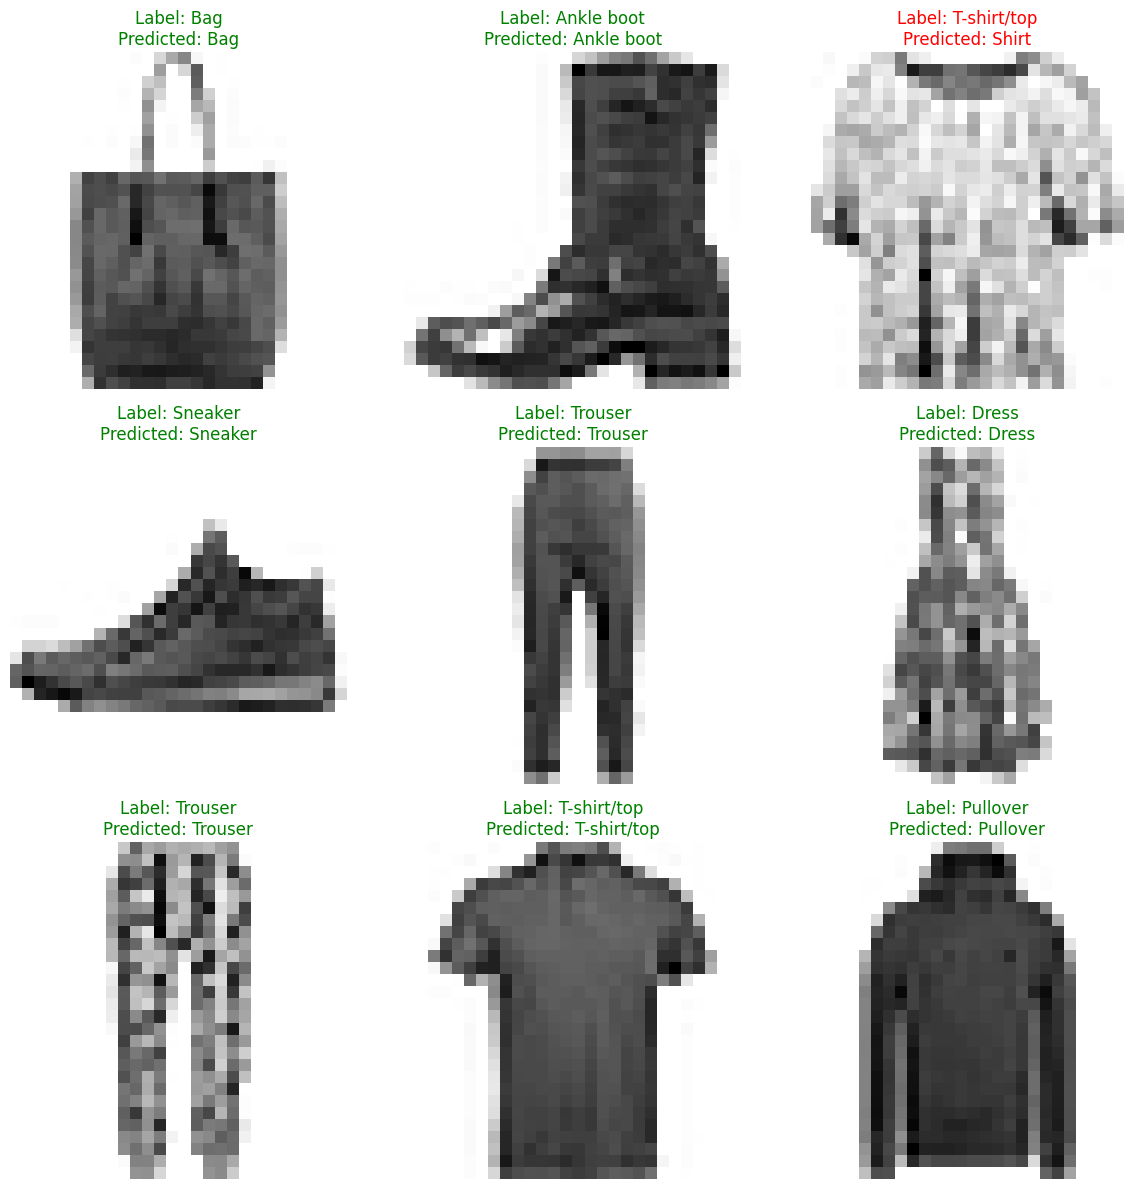

In [37]:
label_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

predicted_indices = np.argmax(preds, axis=1)

# Plot a few images to check the predictions
plt.figure(figsize=(12, 12))
for n in range(9):
    i = np.random.randint(0, len(test_data_raw), 1)[0]

    ax = plt.subplot(3, 3, n + 1)

    plt.imshow(test_data_raw[i], cmap=plt.cm.binary)

    true_label = label_names[test_label[i][0]] if test_label.ndim > 1 else label_names[test_label[i]]
    predicted_label = label_names[predicted_indices[i]]

    title_color = 'green' if true_label == predicted_label else 'red'
    plt.title(f'Label: {true_label}\nPredicted: {predicted_label}', color=title_color)

    plt.axis('off')

plt.tight_layout()
plt.show()

## Part 3. Define a Larger Model and Use Validation Split (1 point)

Create a model called `fmnist_2` which has 3 blocks of Conv-Conv-MaxPooling layers with 64-128-256 filters per block (e.g., the first block should have Conv64-Conv64-MaxPool, etc.), followed by a classifier with a Flatten layer and a sequence of Dense layers with 100, 50, and 10 neurons.

In [43]:
# Input Layer
inputs = Input(shape=(28, 28, 1))

# Conv64 - Conv64 - MaxPool
conv1a = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
conv1b = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv1a)
pool1 = MaxPooling2D()(conv1b)

# Conv128 - Conv128 - MaxPool
conv2a = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(pool1)
conv2b = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv2a)
pool2 = MaxPooling2D()(conv2b)

# Conv256 - Conv256 - MaxPool
conv3a = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(pool2)
conv3b = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(conv3a)
pool3 = MaxPooling2D()(conv3b)

flat = Flatten()(pool3)

dense1 = Dense(100, activation='relu')(flat)

dense2 = Dense(50, activation='relu')(dense1)

outputs = Dense(10, activation='softmax')(dense2)

fmnist_2 = Model(inputs, outputs)

# Display the model architecture summary
fmnist_2.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │       230,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,380,316 (5.27 MB)

 Trainable params: 1,380,316 (5.27 MB)

 Non-trainable params: 0 (0.00 B)

Compile and train the model for 10 epochs with a batch size of 128. Use 25% of the training data for validation.

In [44]:
# Compile the CNN
fmnist_2.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 2. Train the CNN
print("Starting training for fmnist_2...")
history = fmnist_2.fit(train_data_cnn,
                       train_label,
                       epochs=10,
                       batch_size=128,
                       validation_split=0.25)

print("Training complete.")

Starting training for fmnist_2...
Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.6887 - loss: 0.8238 - val_accuracy: 0.8767 - val_loss: 0.3423
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8875 - loss: 0.3048 - val_accuracy: 0.9049 - val_loss: 0.2597
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.9145 - loss: 0.2382 - val_accuracy: 0.9120 - val_loss: 0.2350
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.9281 - loss: 0.1990 - val_accuracy: 0.9217 - val_loss: 0.2188
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9380 - loss: 0.1683 - val_accuracy: 0.9219 - val_loss: 0.2268
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9486 - loss: 0.1443 - val_accuracy: 0.9223 - val_loss: 0.2362
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9548 - loss: 0.1225 - val_accuracy: 0.9241 - val_loss: 0.2342
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accurac

Calculate the accuracy on the test dataset.

Discuss whether the model overfits the training data.

In [45]:
# Evaluate the model directly on the reshaped test data
evals_test = fmnist_2.evaluate(test_data_cnn, test_label, verbose=0)

print("--- Test Evaluation ---")
print("Test Loss: {0:6.4f}".format(evals_test[0]))
print("Test Accuracy: {0:5.2f} %".format(evals_test[1] * 100))

--- Test Evaluation ---
Test Loss: 0.2908
Test Accuracy: 91.72 %


## Part 4. Apply Dropout, Early Stopping (1 point)

Create a model `fmnist_3` which uses a similar network from the previous section but it has a block of layers with 32-64-128 convolutional filters, and add at least 4 Dropout layers in the model. Select a dropout rate of 20% of the neurons.

In [48]:
from tensorflow.keras.layers import Dropout

dropout_rate = 0.2

# Input Layer
inputs = Input(shape=(28, 28, 1))

# 32 Filters
conv1a = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(inputs)
conv1b = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(conv1a)
pool1 = MaxPooling2D()(conv1b)
dropout1 = Dropout(dropout_rate)(pool1)

# 64 Filters
conv2a = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(dropout1)
conv2b = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(conv2a)
pool2 = MaxPooling2D()(conv2b)
dropout2 = Dropout(dropout_rate)(pool2)

# 128 Filters
conv3a = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(dropout2)
conv3b = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(conv3a)
pool3 = MaxPooling2D()(conv3b)

flat = Flatten()(pool3)

dense1 = Dense(100, activation='relu')(flat)
dropout3 = Dropout(dropout_rate)(dense1)

dense2 = Dense(50, activation='relu')(dropout3)
dropout4 = Dropout(dropout_rate)(dense2)

outputs = Dense(10, activation='softmax')(dropout4)

fmnist_3 = Model(inputs, outputs)

# Display the model architecture summary
fmnist_3.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,292 (1.55 MB)

 Trainable params: 407,292 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Train the model, and apply an Early Stopping callback, so that the training stops automatically with a patience of 5 epochs. Note that when applying Early Stopping the number of training epochs should be large enough to allow full covenvergence before stopping the training.

Measure the time for training the model.

In [50]:
import time
from tensorflow.keras.callbacks import EarlyStopping

# Compile the CNN
print("Compiling fmnist_3 model...")
fmnist_3.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Monitors validation loss ('val_loss') and stops training
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)

# Train the CNN with a large number of epochs and measure time
print("Starting training for fmnist_3 with Early Stopping (Patience=5)...")
start_time = time.time()

history = fmnist_3.fit(train_data_cnn,
                       train_label,
                       epochs=50,
                       batch_size=128,
                       validation_split=0.25,
                       callbacks=[early_stop])

end_time = time.time()
training_time = end_time - start_time

print("\nTraining complete.")
print("Total Training Time: {0:6.2f} seconds".format(training_time))

Compiling fmnist_3 model...
Starting training for fmnist_3 with Early Stopping (Patience=5)...
Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9342 - loss: 0.1821 - val_accuracy: 0.9274 - val_loss: 0.2025
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9388 - loss: 0.1646 - val_accuracy: 0.9271 - val_loss: 0.2077
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9410 - loss: 0.1622 - val_accuracy: 0.9286 - val_loss: 0.2067
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9452 - loss: 0.1506 - val_accuracy: 0.9302 - val_loss: 0.2038
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9475 - loss: 0.1450 - val_accuracy: 0.9279 - val_loss: 0.2063
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9495 - loss: 0.1389 - val_accuracy: 0.9307 - val_loss: 0.2033

Training complete.
Total Training Time:  35.75 seconds


Plot the accuracy and loss curves.

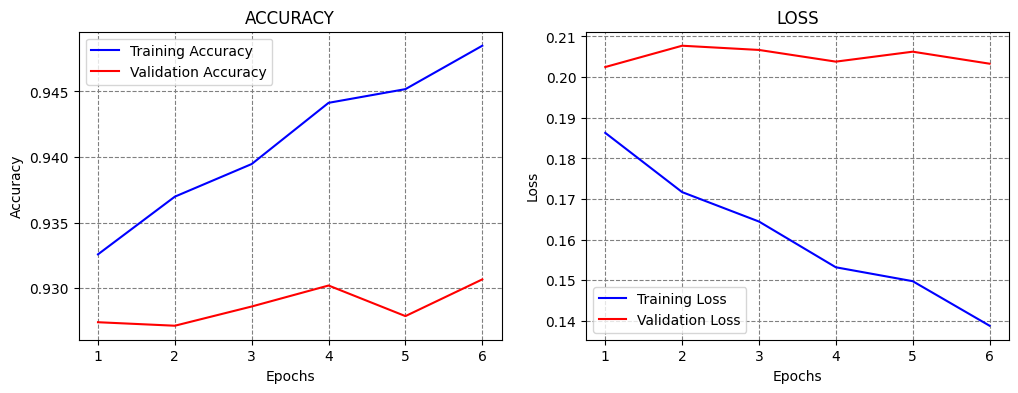

In [52]:
# Extract loss and accuracy metrics from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss) + 1, 1)

plt.figure(figsize=(12, 4))

# plot the accuracy and loss

plt.subplot(1, 2, 1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochsn, train_loss, 'b', label='Training Loss')
plt.plot(epochsn, val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

Calculate the accuracy on the test dataset.

In [53]:
evals_test = fmnist_3.evaluate(test_data_cnn, test_label, verbose=0)

print("--- Test Evaluation ---")
print("Test Accuracy: {0:5.2f} %".format(evals_test[1] * 100))

--- Test Evaluation ---
Test Accuracy: 92.00 %


## Part 5. Batch Normalization, and Data Augmentation (1 point)

Create a model `fmnist_4` which applies a batch normalization layer to each convolutional block of layers in the model from the previous section.

In [54]:
from tensorflow.keras.layers import  BatchNormalization

dropout_rate = 0.2

# Input Layer
inputs = Input(shape=(28, 28, 1))

conv1a = Conv2D(filters=32, kernel_size=3, padding='same')(inputs)
bn1a = BatchNormalization()(conv1a)
relu1a = tf.keras.activations.relu(bn1a) # Apply activation after BN

conv1b = Conv2D(filters=32, kernel_size=3, padding='same')(relu1a)
bn1b = BatchNormalization()(conv1b)
relu1b = tf.keras.activations.relu(bn1b)

pool1 = MaxPooling2D()(relu1b)
dropout1 = Dropout(dropout_rate)(pool1)

conv2a = Conv2D(filters=64, kernel_size=3, padding='same')(dropout1)
bn2a = BatchNormalization()(conv2a)
relu2a = tf.keras.activations.relu(bn2a)

conv2b = Conv2D(filters=64, kernel_size=3, padding='same')(relu2a)
bn2b = BatchNormalization()(conv2b)
relu2b = tf.keras.activations.relu(bn2b)

pool2 = MaxPooling2D()(relu2b)
dropout2 = Dropout(dropout_rate)(pool2)


conv3a = Conv2D(filters=128, kernel_size=3, padding='same')(dropout2)
bn3a = BatchNormalization()(conv3a)
relu3a = tf.keras.activations.relu(bn3a)

conv3b = Conv2D(filters=128, kernel_size=3, padding='same')(relu3a)
bn3b = BatchNormalization()(conv3b)
relu3b = tf.keras.activations.relu(bn3b)

pool3 = MaxPooling2D()(relu3b)

flat = Flatten()(pool3)

dense1 = Dense(100, activation='relu')(flat)
dropout3 = Dropout(dropout_rate)(dense1)


dense2 = Dense(50, activation='relu')(dropout3)
dropout4 = Dropout(dropout_rate)(dense2)

outputs = Dense(10, activation='softmax')(dropout4)

fmnist_4 = Model(inputs, outputs)

# Display the model architecture summary
fmnist_4.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 409,084 (1.56 MB)

 Trainable params: 408,188 (1.56 MB)

 Non-trainable params: 896 (3.50 KB)

Apply data augmentation, by adding width shift (20%), height shift (20%), and horizontal flip.

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation parameters
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

# Fit the generator to the training data
datagen.fit(train_data_cnn)

print("Data Augmentation Generator configured with width shift (20%), height shift (20%), and horizontal flip.")

# Create the augmented data flow
train_generator = datagen.flow(train_data_cnn,
                               train_label,
                               batch_size=128)

Data Augmentation Generator configured with width shift (20%), height shift (20%), and horizontal flip.


Use the `train_test_split` function to create a validation dataset that contains 20% of the training dataset. Display the shapes of the datasets.

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    train_data_cnn,
    train_label,
    test_size=0.2,
    random_state=42
)

# Display the shapes
print('Training images {}'.format(X_train.shape))
print('Training labels {}'.format(y_train.shape))
print('Validation_images {}'.format(X_val.shape))
print('Validation labels {}'.format(y_val.shape))

Training images (48000, 28, 28, 1)
Training labels (48000,)
Validation_images (12000, 28, 28, 1)
Validation labels (12000,)


Train the model using Early Stopping and show the training time.

In [57]:
# Compile the CNN
print("Compiling fmnist_4 model...")
fmnist_4.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)

print("Starting training for fmnist_4 with Early Stopping (Patience=5)...")
start_time = time.time()

history = fmnist_4.fit(X_train,
                       y_train,
                       epochs=50,
                       batch_size=128,
                       validation_data=(X_val, y_val),
                       callbacks=[early_stop])

end_time = time.time()
training_time = end_time - start_time

print("\nTraining complete.")
print("Total Training Time: {0:6.2f} seconds".format(training_time))

Compiling fmnist_4 model...
Starting training for fmnist_4 with Early Stopping (Patience=5)...
Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.6422 - loss: 1.0045 - val_accuracy: 0.3818 - val_loss: 1.7523
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8626 - loss: 0.3981 - val_accuracy: 0.8700 - val_loss: 0.3457
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8842 - loss: 0.3290 - val_accuracy: 0.8978 - val_loss: 0.2838
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9011 - loss: 0.2847 - val_accuracy: 0.9102 - val_loss: 0.2491
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9069 - loss: 0.2617 - val_accuracy: 0.9042 - val_loss: 0.2604
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9132 - loss: 0.2450 - val_accuracy: 0.9097 - val_loss: 0.2448
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9206 - loss: 0.2262 - val_accuracy: 0.9190 - val_loss: 0.2270
E

Plot the accuracy and loss curves.

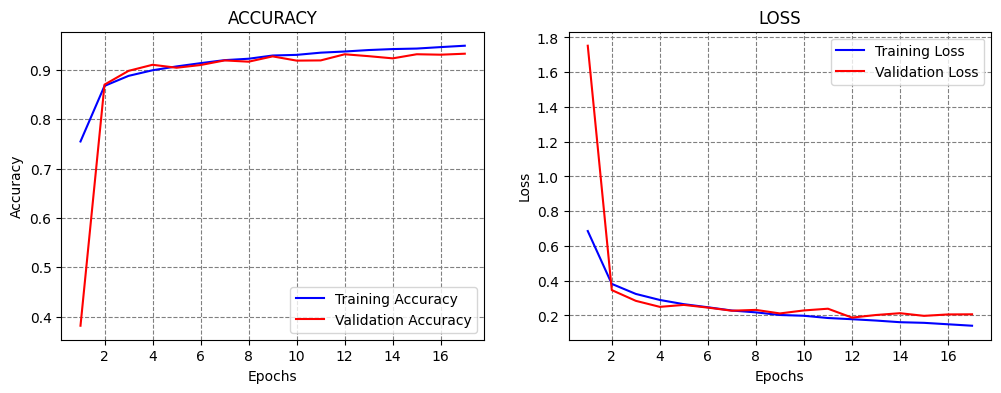

In [58]:
# Extract loss and accuracy metrics
train_loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochsn = np.arange(1, len(train_loss) + 1, 1)

plt.figure(figsize=(12, 4))

# Subplot 1: ACCURACY
plt.subplot(1, 2, 1)
plt.plot(epochsn, acc, 'b', label='Training Accuracy')
plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Subplot 2: LOSS
plt.subplot(1, 2, 2)
plt.plot(epochsn, train_loss, 'b', label='Training Loss')
plt.plot(epochsn, val_loss, 'r', label='Validation Loss')
plt.grid(color='gray', linestyle='--')
plt.legend()
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

Calculate the accuracy on the test dataset.

In [59]:
evals_test = fmnist_4.evaluate(test_data_cnn, test_label, verbose=0)

print("--- Test Evaluation ---")
print("Test Accuracy: {0:5.2f} %".format(evals_test[1] * 100))

--- Test Evaluation ---
Test Accuracy: 92.86 %


## Part 6. Saving and Loading the Model (1 point)

Save the latest model.

In [60]:
model_filename = 'fmnist_4_best_bn_dropout.h5'

fmnist_4.save(model_filename)

print(f"Model successfully saved as: {model_filename}")

Model successfully saved as: fmnist_4_best_bn_dropout.h5


Load the saved model and check if the accuracy on the test set matches the one calculated previously.

In [61]:
from tensorflow.keras.models import load_model


model_filename = 'fmnist_4_best_bn_dropout.h5'

# Load the entire model
print(f"Loading model from: {model_filename}...")
try:
    loaded_model = load_model(model_filename)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# Evaluate the loaded model on the test data
print("\nEvaluating loaded model on test dataset...")
evals_test_loaded = loaded_model.evaluate(test_data_cnn, test_label, verbose=0)

print("--- Accuracy Verification ---")
test_accuracy_loaded = evals_test_loaded[1] * 100

print("Test Accuracy from Loaded Model: {0:5.2f} %".format(test_accuracy_loaded))

Loading model from: fmnist_4_best_bn_dropout.h5...


Model loaded successfully.

Evaluating loaded model on test dataset...
--- Accuracy Verification ---
Test Accuracy from Loaded Model: 92.86 %


What is the total number of parameters of this model?

In [62]:
fmnist_4.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 1,225,462 (4.67 MB)

 Trainable params: 408,188 (1.56 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 816,378 (3.11 MB)